In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
base_path = "models/alexnet/test/test-6/"

In [3]:
df = pd.read_csv(os.path.join(base_path,"pruning_test.txt"))
df
df.head()

,iteration,block,current_num_out_channels,constraint,simplified_resource,selected
0,1,0,64,674626768.0,710133440.0,Not
1,1,0,48,674626768.0,636577040.0,OK
2,1,1,192,674626768.0,710133440.0,Not
3,1,1,176,674626768.0,682126016.0,Not
4,1,1,160,674626768.0,654118592.0,OK


In [4]:
df_ok = df[df["selected"] == "OK"]
df_ok["parameters"] = 0
df_ok["accuracy"] = 0
len(df_ok)

/tmp/ipykernel_8872/259045514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok["parameters"] = 0
/tmp/ipykernel_8872/259045514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok["accuracy"] = 0


52

In [5]:
df_ok

,iteration,block,current_num_out_channels,constraint,simplified_resource,selected,parameters,accuracy
1,1,0,48,6.746268e+08,636577040.0,OK,0,0
4,1,1,160,6.746268e+08,654118592.0,OK,0,0
9,1,2,320,6.746268e+08,666523328.0,OK,0,0
13,1,3,208,6.746268e+08,663408320.0,OK,0,0
19,1,4,176,6.746268e+08,667186880.0,OK,0,0
187,1,5,1424,6.746268e+08,674563776.0,OK,0,0
445,2,0,32,6.024906e+08,563020640.0,OK,0,0
448,2,1,160,6.024906e+08,589893392.0,OK,0,0
453,2,2,320,6.024906e+08,592966928.0,OK,0,0
457,2,3,208,6.024906e+08,589851920.0,OK,0,0


In [6]:
print("Constraint reduction : ", np.amin(df["constraint"]) / np.amax(df["constraint"]) * 100)
print("Simplified resource reduction : ", np.amin(df["simplified_resource"]) / np.amax(df["simplified_resource"]) * 100)


Constraint reduction :  43.3386453710077
Simplified resource reduction :  36.90428660844362


In [7]:
for idx, row in df_ok.iterrows():
    iteration = row.iteration
    block = row.block
    acc = float(open(os.path.join(base_path, f"worker/iter_{iteration}_block_{block}_accuracy.txt"), "r").read())

    df_ok.at[idx,"accuracy"] = acc
    try:
        temp_model = torch.load(os.path.join(base_path,f"master/iter_{iteration}_block_{block}_model.pth.tar"))
        df_ok.at[idx,"parameters"] = sum(p.numel() for p in temp_model.parameters() if p.requires_grad)
    except Exception as e:
        pass

/tmp/ipykernel_8872/3994302832.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '81.78' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_ok.at[idx,"accuracy"] = acc


In [8]:
df_ok.groupby("iteration").count()

,block,current_num_out_channels,constraint,simplified_resource,selected,parameters,accuracy
iteration,,,,,,,
1,6,6,6,6,6,6,6
2,6,6,6,6,6,6,6
3,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5
6,5,5,5,5,5,5,5
7,5,5,5,5,5,5,5
8,5,5,5,5,5,5,5
9,5,5,5,5,5,5,5


<Axes: >

<Figure size 1500x1000 with 0 Axes>

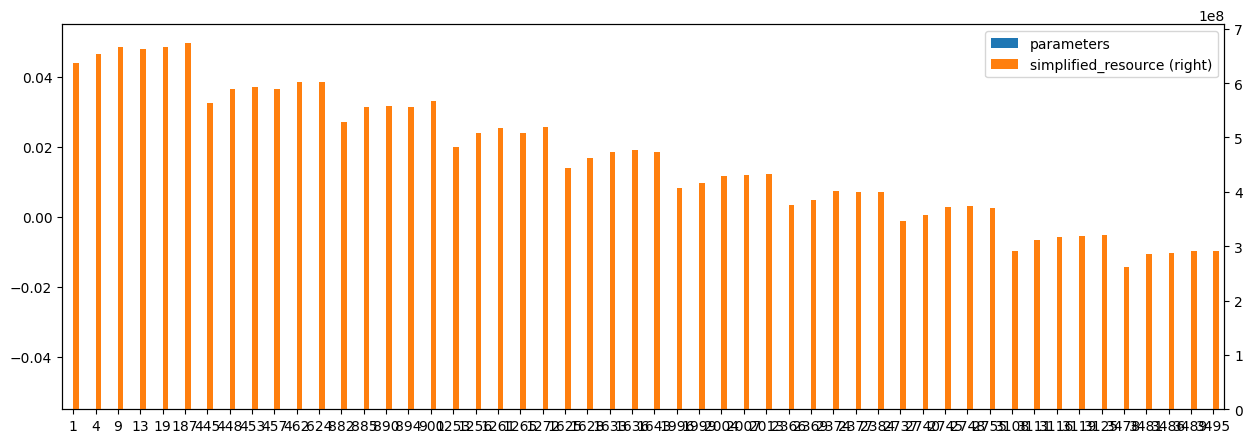

In [9]:
df_plot = df_ok[["parameters","simplified_resource"]]
plt.figure(figsize=(15,10))
df_plot.plot( kind= 'bar' , secondary_y= 'simplified_resource' , rot= 0, figsize=(15,5) )

In [10]:
df_ok["block"].value_counts()

block
0    10
1    10
2    10
3    10
4    10
5     2
Name: count, dtype: int64

In [11]:
df_ok[["block","accuracy"]].groupby("block").mean()

,accuracy
block,
0,76.170
1,77.474
2,78.426
3,78.754
4,75.912
5,82.240


In [12]:
hist = pd.read_csv("models/alexnet/test/test-6/master/history.txt")
hist

,Iteration,Accuracy,Resource,Block,Source Model
0,99.81,710133440.0,NaN,models/alexnet/model_cuda.pth.tar,64 192 384 256 256 4096 4096 10
1,81.78,636577040.0,0.0,models/alexnet/test/test-6/worker/iter_1_block...,48 192 384 256 256 4096 4096 10
2,81.96,602285328.0,5.0,models/alexnet/test/test-6/worker/iter_2_block...,48 192 384 256 256 1520 4096 10
3,82.10,555560208.0,3.0,models/alexnet/test/test-6/worker/iter_3_block...,48 192 384 208 256 1520 4096 10
4,81.16,508876560.0,1.0,models/alexnet/test/test-6/worker/iter_4_block...,48 160 384 208 256 1520 4096 10
5,80.40,462192912.0,1.0,models/alexnet/test/test-6/worker/iter_5_block...,48 128 384 208 256 1520 4096 10
6,79.68,431042832.0,3.0,models/alexnet/test/test-6/worker/iter_6_block...,48 128 384 176 256 1520 4096 10
7,79.06,401450256.0,2.0,models/alexnet/test/test-6/worker/iter_7_block...,48 128 320 176 256 1520 4096 10
8,76.50,346556256.0,0.0,models/alexnet/test/test-6/worker/iter_8_block...,32 128 320 176 256 1520 4096 10
9,75.02,316963680.0,2.0,models/alexnet/test/test-6/worker/iter_9_block...,32 128 256 176 256 1520 4096 10


710133440.0 - 0.05
639120095.955 - 0.048
575208086.3163 - 0.04608
517687277.6431981 - 0.04423679999999999
465918549.8390652 - 0.042467328
419326694.81693804 - 0.040768634879999995
377394025.2985525 - 0.039137889484799994
339654622.7334732 - 0.03757237390540799
305689160.4263107 - 0.03606947894919167
275120244.35121715 - 0.03462669979122401
247608219.8849314 - 0.03324163179957504
222847397.8665208 - 0.03191196652759204
200562658.05114794 - 0.030635487866488356
180506392.21846122 - 0.029410068351828824


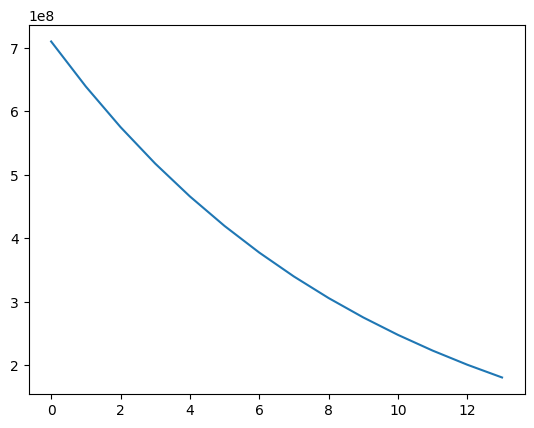

14

In [13]:
current_resource = 710133440.0
budget_ratio = 0.25 # -bur
init_resource_reduction = 0.05 # -irr
resource_reduction_decay = 0.96 # -rd
budget = budget_ratio*current_resource

max_iters=500

current_iter = 1

cut = []

while current_iter <= max_iters and current_resource > budget:            
    # Set the target resource.
    target_resource = current_resource - init_resource_reduction * (resource_reduction_decay ** (current_iter - 1))
    # print(f"{current_resource} - {init_resource_reduction} * ( {resource_reduction_decay ** (current_iter - 1)} )")
    print(f"{current_resource} - {init_resource_reduction * resource_reduction_decay ** (current_iter - 1)}")

    # cut.append(init_resource_reduction * resource_reduction_decay ** (current_iter - 1))
    cut.append(target_resource)


    # Print the message.
    # print('===================================================================')
    # print(
    #     ('Process iteration {:>3}: '
    #         'current_resource = {:>8.3f}, target_resource = {:>8.3f}').format(
    #         current_iter, current_resource, target_resource))
            
    # current_resource = hist.at[current_iter,"Resource"]
    current_resource = target_resource*0.9

    # print(f"Reduction Rate = {current_resource/target_resource*100}")
    # current_resource = np.amax(df[df["simplified_resource"] < target_resource]["simplified_resource"])
    
    current_iter += 1

plt.plot(cut)
plt.show()
len(cut)

In [15]:
fine_tune_models = pd.read_csv("models/alexnet/test/test-6/fine-tune.txt")
fine_tune_models

,iteration,block,path,server_acc,train_acc_0,train_acc_1,train_acc_2,train_acc_3,train_acc_4,train_acc_5,...,train_acc_9test_acc_0,test_acc_1,test_acc_2,test_acc_3,test_acc_4,test_acc_5,test_acc_6,test_acc_7,test_acc_8,test_acc_9
0,10,0,./models/alexnet/test/test-6/worker/iter_10_bl...,0.8032,0.842697,0.817484,0.682759,0.795089,0.675000,0.828660,...,0.81768459434822240.8421985815602837,0.829123,0.712731,0.754445,0.600,0.843361,0.772848,0.887255,0.837803,0.776664
1,10,1,./models/alexnet/test/test-6/worker/iter_10_bl...,0.8068,0.841514,0.820703,0.672595,0.780130,0.691667,0.834545,...,0.81555758128228510.8439716312056738,0.838782,0.697497,0.745131,0.675,0.835062,0.770861,0.898284,0.826948,0.791249
2,10,2,./models/alexnet/test/test-6/worker/iter_10_bl...,0.8056,0.837966,0.818227,0.677677,0.780977,0.666667,0.816546,...,0.82224247948951690.8280141843971631,0.834324,0.695321,0.751905,0.650,0.826763,0.779470,0.892157,0.833333,0.795807
3,10,3,./models/alexnet/test/test-6/worker/iter_10_bl...,0.8068,0.833826,0.817732,0.676225,0.776461,0.683333,0.843891,...,0.82072318444241880.8457446808510638,0.821694,0.708379,0.752752,0.675,0.842324,0.786093,0.895833,0.842273,0.790337
4,10,4,./models/alexnet/test/test-6/worker/iter_10_bl...,0.7958,0.829687,0.815750,0.651543,0.785210,0.641667,0.852198,...,0.81646915831054390.8404255319148937,0.821694,0.696409,0.750212,0.625,0.839212,0.783444,0.894608,0.836526,0.797630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,9,2,./models/alexnet/test/test-6/worker/iter_9_blo...,0.8050,0.843288,0.815503,0.682396,0.780130,0.700000,0.825891,...,0.81130355515041020.8421985815602837,0.825409,0.695321,0.743438,0.750,0.838174,0.803311,0.904412,0.842912,0.780310
66,9,3,./models/alexnet/test/test-6/worker/iter_9_blo...,0.8042,0.819633,0.827142,0.669691,0.793960,0.725000,0.831430,...,0.82011546642357950.8386524822695035,0.844725,0.715996,0.765453,0.650,0.846473,0.782119,0.898284,0.826948,0.807657
67,9,4,./models/alexnet/test/test-6/worker/iter_9_blo...,0.8028,0.833826,0.811540,0.670054,0.790573,0.683333,0.825891,...,0.8319659677909450.8280141843971631,0.834324,0.697497,0.771380,0.700,0.819502,0.762252,0.893382,0.828863,0.793072
68,9,5,./models/alexnet/test/test-6/worker/iter_9_blo...,0.4970,0.516263,0.532194,0.351724,0.452441,0.575000,0.568017,...,0.55241567912488610.5141843971631206,0.514116,0.384113,0.428450,0.600,0.548755,0.532450,0.639706,0.365262,0.531449


In [17]:
df_ok

,iteration,block,current_num_out_channels,constraint,simplified_resource,selected,parameters,accuracy
1,1,0,48,6.746268e+08,636577040.0,OK,0,81.78
4,1,1,160,6.746268e+08,654118592.0,OK,0,82.34
9,1,2,320,6.746268e+08,666523328.0,OK,0,81.88
13,1,3,208,6.746268e+08,663408320.0,OK,0,82.64
19,1,4,176,6.746268e+08,667186880.0,OK,0,79.10
187,1,5,1424,6.746268e+08,674563776.0,OK,0,82.52
445,2,0,32,6.024906e+08,563020640.0,OK,0,79.10
448,2,1,160,6.024906e+08,589893392.0,OK,0,81.44
453,2,2,320,6.024906e+08,592966928.0,OK,0,81.10
457,2,3,208,6.024906e+08,589851920.0,OK,0,81.30


In [31]:
208271360.0 / 213879808.0

0.9737775713731704

In [6]:
hist = pd.read_csv("projects/test/test-6-model-size/master/history.txt")
hist

,Iteration,Accuracy,Resource,Block,Source Model
0,99.810,225136640.0,NaN,projects/define_pretrained_fed_sim_NIID_alpha0...,64 192 384 256 256 4096 4096 10
1,42.368,215699456.0,4.0,projects/test/test-6-model-size/worker/iter_1_...,64 192 384 256 224 4096 4096 10


::: Current : 225136640.0 	| Target : 180109312.0
::: Found :  174706032.64
::: Current : 174706032.64 	| Target : 131479797.76
::: Found :  127535403.83
::: Current : 127535403.83 	| Target : 86038218.34
::: Found :  83457071.79
::: Current : 83457071.79 	| Target : 43619773.73
::: Found :  42311180.51


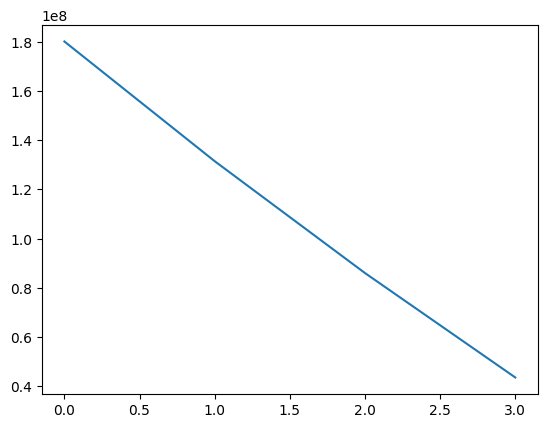

4

In [32]:
current_resource = 225136640.0
budget_ratio = 0.25 # -bur
init_resource_reduction_ratio = 0.2 # 0.05 # -irr
resource_reduction_decay = 0.96 # -rd
budget = budget_ratio*current_resource

max_iters=500

current_iter = 1

cut = []

init_resource_reduction = init_resource_reduction_ratio*current_resource

while current_iter <= max_iters and current_resource > budget:            
    # Set the target resource.
    target_resource = current_resource - init_resource_reduction * (
                resource_reduction_decay ** (current_iter - 1))
    
    print("::: Current :", round(current_resource,2), "\t| Target :" , round(target_resource,2))
    # print("::: Reduction :", target_resource / current_resource)
    # print(init_resource_reduction * (resource_reduction_decay ** (current_iter - 1)))


    
    # print(f"{current_resource} - {init_resource_reduction} * ( {resource_reduction_decay ** (current_iter - 1)} )")
    # print(f"{current_resource} - {init_resource_reduction * resource_reduction_decay ** (current_iter - 1)}")

    # cut.append(init_resource_reduction * resource_reduction_decay ** (current_iter - 1))
    cut.append(target_resource)


    # Print the message.
    # print('===================================================================')
    # print(
    #     ('Process iteration {:>3}: '
    #         'current_resource = {:>8.3f}, target_resource = {:>8.3f}').format(
    #         current_iter, current_resource, target_resource))
            
    # current_resource = hist.at[current_iter,"Resource"]
    current_resource = target_resource*0.97
    print("::: Found : " , round(current_resource,2))
    print("============")

    # print(f"Reduction Rate = {current_resource/target_resource*100}")
    # current_resource = np.amax(df[df["simplified_resource"] < target_resource]["simplified_resource"])
    
    current_iter += 1

plt.plot(cut)
plt.show()
len(cut)

225136640.0
42311180.51